## Exploratory Data Analysis

update from 29.09.20
1. correct the ideas about campaigns

As it folows from the description, campaign refers to the number of contacts performed during this campaign and for this client, and not to some campaign

2. added clarification to questions


- Target variables are highly disproportional

Why is it important? What’s the impact of this finding?
- Some numeric columns can be treated as categorical, and some can be transformed into categories by splitting into groups.

Could you please clarify the expected benefit of such transformation?

- Here is a strong correlation between euribor3m and emp.var.rate variables

How would you explain such a strong relationship?

- Filling missing values is reasonable for some categorical variables

What are some suitable strategies? How would you choose the most appropriate one?

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    
**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:

 1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
 2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
 3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
 4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).



### Attribute Information:

Input variables:
#### bank client data:

1.  **age** (numeric)
2.  **job** : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3.  **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  **default**: has credit in default? (categorical: 'no','yes','unknown')
6.  **housing**: has housing loan? (categorical: 'no','yes','unknown')
7.  **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8.  **contact**: contact communication type (categorical: 'cellular','telephone')
9.  **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12.  **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  **previous**: number of contacts performed before this campaign and for this client (numeric)
15.  **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16.  **emp.var.rate**: employment variation rate  quarterly indicator (numeric)
17.  **cons.price.idx**: consumer price index  monthly indicator (numeric)
18.  **cons.conf.idx**: consumer confidence index  monthly indicator (numeric)
19.  **euribor3m**: euribor 3 month rate  daily indicator (numeric)
20.  **nr.employed**: number of employees  quarterly indicator (numeric)

Output variable (desired target):
21.  **y**  has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# import all the libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

import pods
import zipfile
SEED = 123

from IPython.display import display
import random
import time

pd.options.display.max_columns = None
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [2]:
pods.util.download_url('http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip')

zip = zipfile.ZipFile('./bank-additional.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

pods.util.download_url('http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')

zip = zipfile.ZipFile('./bank.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

[==============================]   0.424/0.424MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [3]:
import os
os.listdir()

['bank-names.txt',
 'bank.csv',
 '.DS_Store',
 'bank.zip',
 'Prediction_classification.ipynb',
 'bank-additional',
 'bank-full.csv',
 'README.md',
 '__MACOSX',
 'EDA-Copy1.ipynb',
 '.gitignore',
 '.ipynb_checkpoints',
 'bank-additional.zip',
 '.git']

## Data exploration

Tasks:
    - counts or distributions of all variables
    - data type for each feature
    - missing data and duplicates
    - correlations

In [4]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep =";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
map_dict= {"no":0, "yes":1}
df["y"] = df["y"].map(map_dict)

In [6]:
print("The dataset has %d rows and %d columns" % (df.shape[0], df.shape[1]))

The dataset has 41188 rows and 21 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Target

In [9]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

#### Observation:
The target values are highly disproportional

## Continious variables

In [10]:
cont_variables = [col for col in df.columns if df[col].dtype!="object"]
cont_variables

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [11]:
df[cont_variables].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#### Observations:
 - there is no explicit missing (null values) among continious variables
 - but for the column pdays 999 means client was not previously contacted, 
so it might be reasonable to make a new column indicating the presence of this feature

In [12]:
df.groupby(df["pdays"]==999).agg({"y": ["mean", "count"]})

y       
           mean  count
pdays                 
False  0.638284   1515
True   0.092582  39673

#### Observation:
- when the variable "pdays" is equal to 999 (no previous contacts), it is more likely to have y=0

### Ordinal or continious variables

In [13]:
cat_col = {}
for col in set(cont_variables)-set(["y"]):
    n_unique = df[col].nunique()
    print("Column %s, Number of unique values: %d, " % (col, n_unique))
    if n_unique<50:
        cat_col[col]=n_unique

Column emp.var.rate, Number of unique values: 10, 
Column campaign, Number of unique values: 42, 
Column cons.price.idx, Number of unique values: 26, 
Column age, Number of unique values: 78, 
Column duration, Number of unique values: 1544, 
Column cons.conf.idx, Number of unique values: 26, 
Column nr.employed, Number of unique values: 11, 
Column previous, Number of unique values: 8, 
Column euribor3m, Number of unique values: 316, 
Column pdays, Number of unique values: 27, 


In [14]:
cat_col 

{'emp.var.rate': 10,
 'campaign': 42,
 'cons.price.idx': 26,
 'cons.conf.idx': 26,
 'nr.employed': 11,
 'previous': 8,
 'pdays': 27}

#### Conclusion:
Considering number of unique variants and data description, "campaign" is a categorical variable.
At the same time, due to a small number of unique values, some other columns might be treated in the same way.

In [15]:
cat_col = ["campaign", "nr.employed"]

In [16]:
trully_cont_col = list(set(cont_variables) - set(cat_col)- set(["y"]))
trully_cont_col

['emp.var.rate',
 'cons.price.idx',
 'age',
 'duration',
 'cons.conf.idx',
 'previous',
 'euribor3m',
 'pdays']

#### Which features might be strong indicators

In [17]:
df[trully_cont_col+["y"]].groupby("y").mean()

,emp.var.rate,cons.price.idx,age,duration,cons.conf.idx,previous,euribor3m,pdays
y,,,,,,,,
0,0.248875,93.603757,39.911185,220.844807,-40.593097,0.132374,3.811491,984.113878
1,-1.233448,93.354386,40.913147,553.191164,-39.789784,0.492672,2.123135,792.035560


#### Observations:
- Several features stand out: duration and emp.var.rate

### Shape of the features and how they relate to the target variable

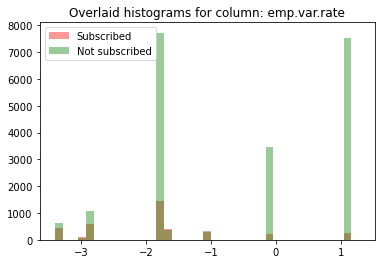

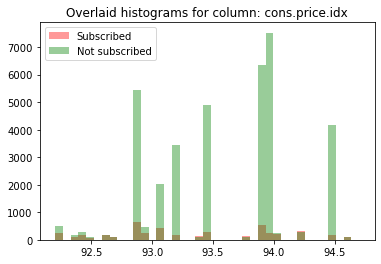

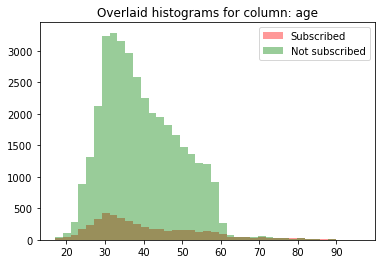

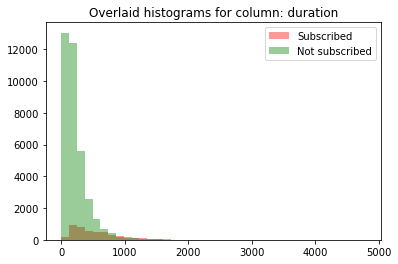

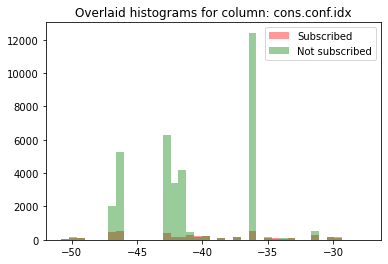

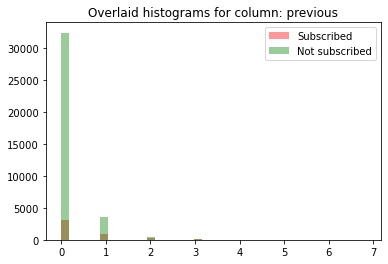

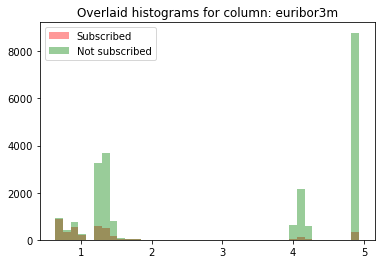

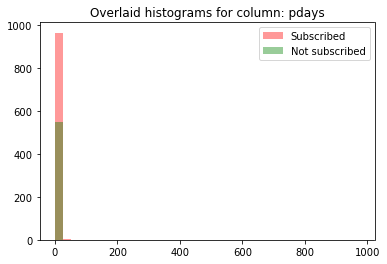

In [18]:
n_bins =40
for col in trully_cont_col:
    subscribed = df[df["y"] == 1][col].values
    not_subscribed = df[df["y"] == 0][col].values
    xmin = min(min(subscribed), min(not_subscribed))
    xmax = max(max(subscribed), max(not_subscribed))
    width = (xmax-xmin)/n_bins
    sns.distplot(subscribed, color = "red", kde = False, bins = np.arange(xmin, xmax, width), label = "Subscribed")
    sns.distplot(not_subscribed, color = "green", kde = False, bins = np.arange(xmin, xmax, width), label = "Not subscribed")
    plt.legend()
    plt.title("Overlaid histograms for column: %s" % col)
    plt.show()
    

#### Observation:
"euribor3m" can be potentially transformed into 4-categorical  variable:
    ([<1.2], [1.2, 2], [3.8, 4.2, [>4.5]]

In [19]:
df["new_euribor3m"] = df["euribor3m"].apply(lambda x: 1 if x<1.2 else
                                            (2 if (x>1.2 and x<2) else
                                            (3 if (x>3.8 and x<4.2) else 4)))

cat_col.append("new_euribor3m")
df["new_euribor3m"].value_counts()                                            

4    24131
2     9238
1     4260
3     3559
Name: new_euribor3m, dtype: int64

<Figure size 432x288 with 0 Axes>

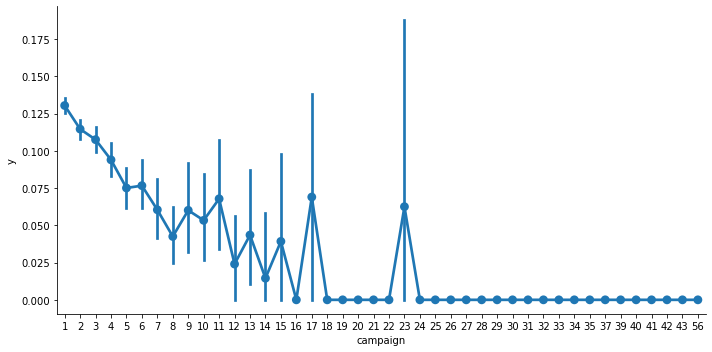

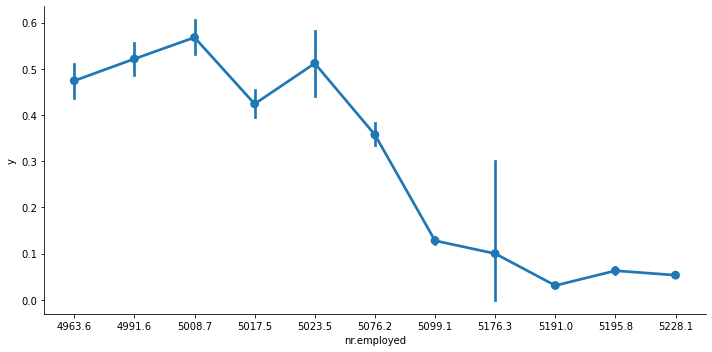

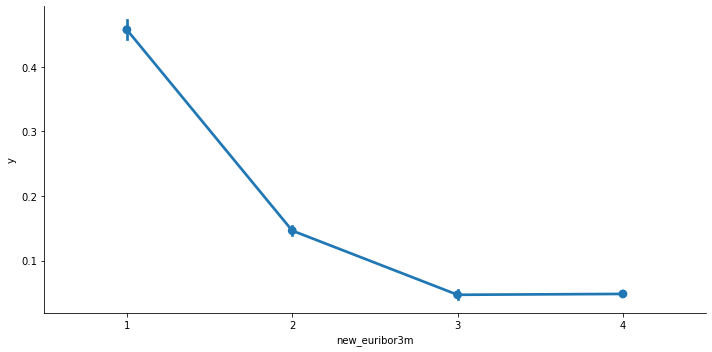

In [20]:
for i, col in enumerate(cat_col):
    plt.figure(i)
    sns.catplot(x=col, y="y", data =df, kind= "point", aspect =2);

In [21]:
len(df[df["y"]==0]["campaign"].values)

36548

### Inefficient campaigns which has only y=0

In [22]:
gr = df.groupby(["campaign", "y"])[["age"]].count().reset_index("y")
zero_campaigns = set(gr.index) - set(gr[gr["y"]==1].index)
print("Total number of unique campaigns /Number of contacts performed during this campaign and for this client):", df["campaign"].nunique())
print("Number of inefficient sets of contacts", len(zero_campaigns))

Total number of unique campaigns /Number of contacts performed during this campaign and for this client): 42
Number of inefficient sets of contacts 25


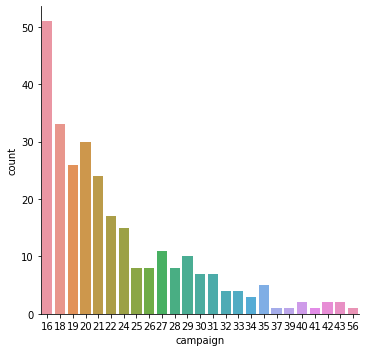

In [23]:
df2 = df.set_index("campaign").loc[zero_campaigns, :].reset_index()
sns.catplot(x="campaign", kind="count", data=df2);

In [24]:
df[df["campaign"]==20].shape

(30, 22)

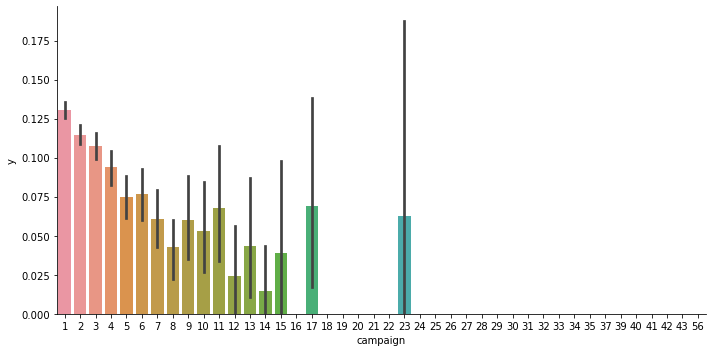

In [48]:
sns.catplot(x="campaign", y="y", data =df, kind= "bar", aspect=2);

In [63]:
df["campaign_7"] = np.where(df["campaign"]<=7, "less_7", "more_7")

In [49]:
df[df["campaign"]==23]["y"].value_counts()

0    15
1     1
Name: y, dtype: int64

In [50]:
df[df["campaign"]==23]["y"].mean(), df[df["campaign"]==23]["y"].std()

(0.0625, 0.25)

#### Observations:
y-axis corresponds to percent of people subscribed to a service 
As it can be seen from the data, campaigns >25 were not efficient at all

Increase in euribor leads to decrease in subsription

###  Correlation

In [25]:
corr = df[trully_cont_col].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,emp.var.rate,cons.price.idx,age,duration,cons.conf.idx,previous,euribor3m,pdays
emp.var.rate,1.00,0.78,-0.00,-0.03,0.20,-0.42,0.97,0.27
cons.price.idx,0.78,1.00,0.00,0.01,0.06,-0.20,0.69,0.08
age,-0.00,0.00,1.00,-0.00,0.13,0.02,0.01,-0.03
duration,-0.03,0.01,-0.00,1.00,-0.01,0.02,-0.03,-0.05
cons.conf.idx,0.20,0.06,0.13,-0.01,1.00,-0.05,0.28,-0.09
previous,-0.42,-0.20,0.02,0.02,-0.05,1.00,-0.45,-0.59
euribor3m,0.97,0.69,0.01,-0.03,0.28,-0.45,1.00,0.30
pdays,0.27,0.08,-0.03,-0.05,-0.09,-0.59,0.30,1.00


#### Observation
There is a strong correlation between euribor3m and emp.var.rate

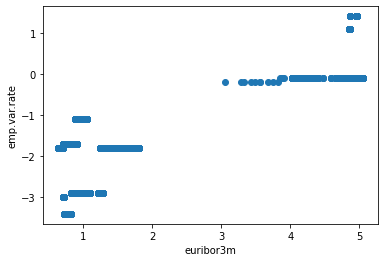

In [26]:
plt.scatter(df["euribor3m"], df["emp.var.rate"])
plt.xlabel("euribor3m")
plt.ylabel("emp.var.rate");

## Categorical variables

In [27]:
text_cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

In [28]:
print("Number of raws in the dataset: ", df.shape[0])
for col in text_cat_columns:
    print("Column {}, Number of groups: {}, Missing values: {} %".format
         (col, df[col].nunique(), round(df[df[col]=="unknown"].shape[0]*100/df.shape[0], 2)))

Number of raws in the dataset:  41188
Column job, Number of groups: 12, Missing values: 0.8 %
Column marital, Number of groups: 4, Missing values: 0.19 %
Column education, Number of groups: 8, Missing values: 4.2 %
Column default, Number of groups: 3, Missing values: 20.87 %
Column housing, Number of groups: 3, Missing values: 2.4 %
Column loan, Number of groups: 3, Missing values: 2.4 %
Column contact, Number of groups: 2, Missing values: 0.0 %


### How many missing values inside rows

In [29]:
df["missing_rows"] = df[text_cat_columns].isin(['unknown']).sum(axis=1)
print("Max number of missing values inside rows:", df["missing_rows"].max())
print("Number of rows with max number of missing values:", df[df["missing_rows"]== df["missing_rows"].max()].shape[0])

Max number of missing values inside rows: 5
Number of rows with max number of missing values: 2


In [30]:
df[df["missing_rows"]== df["missing_rows"].max()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,new_euribor3m,missing_rows
2723,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,179,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,4,5
21556,44,unknown,married,unknown,unknown,unknown,unknown,cellular,aug,tue,163,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,4,5


### Distribution of missing values with respect to y

#### checking possible scenarios of missing data
- completely at random (MCAR)
- missing at random (MAR)
- not missing at random (MNAR)

In [31]:
for col in text_cat_columns:
    print("\nColumn:", col)
    display(round(df.groupby(df[col]=="unknown")[["y"]].mean(),2))
    gr = df.groupby(["y", col])[["age"]].count()
    print("Most frequent category in column %s for y=0: %s, for y=1: %s" % (col,
                                                                            gr.reset_index(col).loc[0, col].values[0], 
                                                                            gr.reset_index(col).loc[1, col].values[0]))


Column: job


,y
job,
False,0.11
True,0.11


Most frequent category in column job for y=0: admin., for y=1: admin.

Column: marital


,y
marital,
False,0.11
True,0.15


Most frequent category in column marital for y=0: divorced, for y=1: divorced

Column: education


,y
education,
False,0.11
True,0.15


Most frequent category in column education for y=0: basic.4y, for y=1: basic.4y

Column: default


,y
default,
False,0.13
True,0.05


Most frequent category in column default for y=0: no, for y=1: no

Column: housing


,y
housing,
False,0.11
True,0.11


Most frequent category in column housing for y=0: no, for y=1: no

Column: loan


,y
loan,
False,0.11
True,0.11


Most frequent category in column loan for y=0: no, for y=1: no

Column: contact


,y
contact,
False,0.11


Most frequent category in column contact for y=0: cellular, for y=1: cellular


In [32]:
df["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [33]:
df.groupby(["default", "y"])[["age"]].count()

age
default y       
no      0  28391
        1   4197
unknown 0   8154
        1    443
yes     0      3

<Figure size 432x288 with 0 Axes>

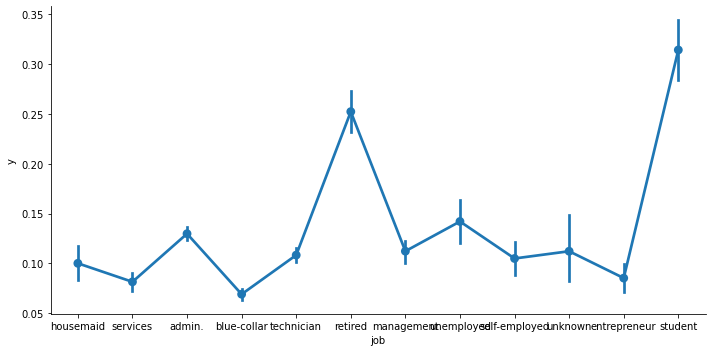

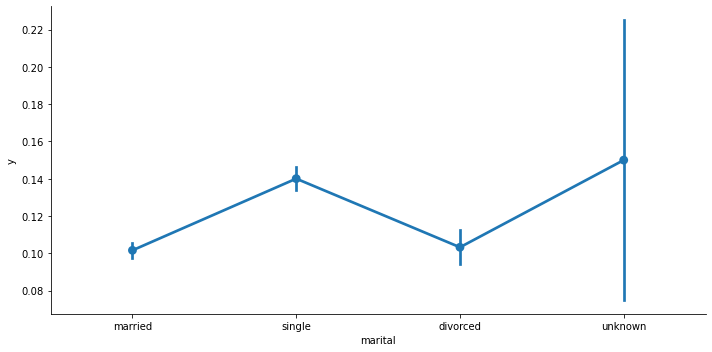

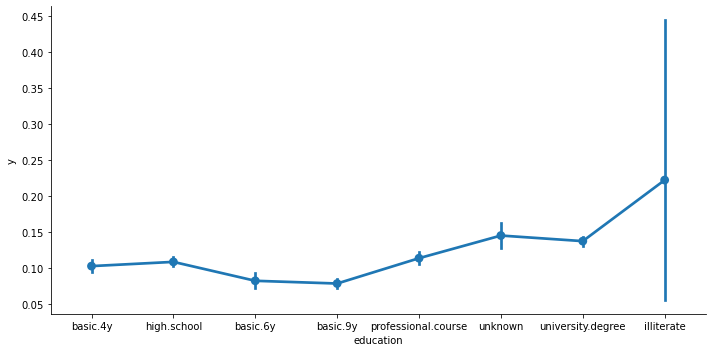

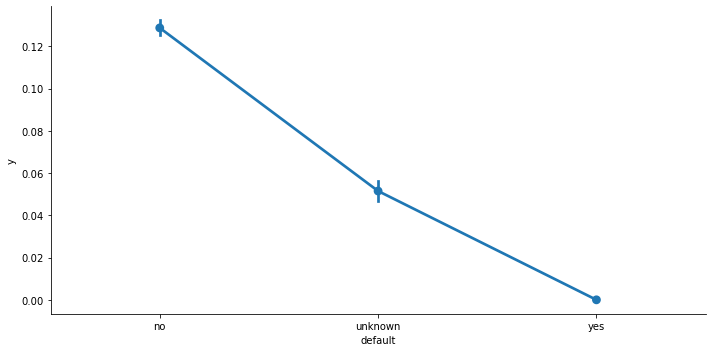

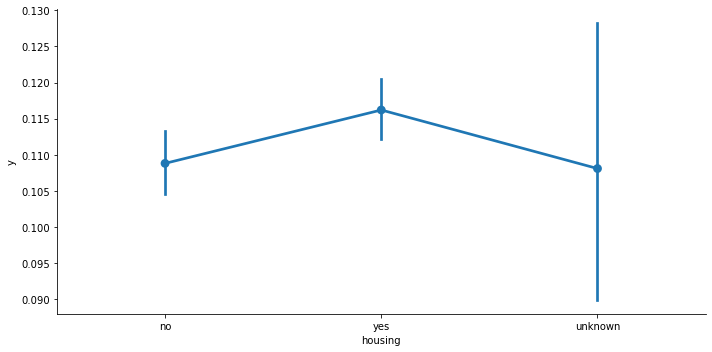

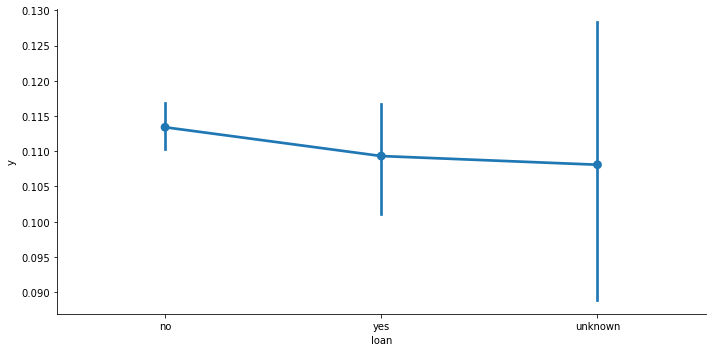

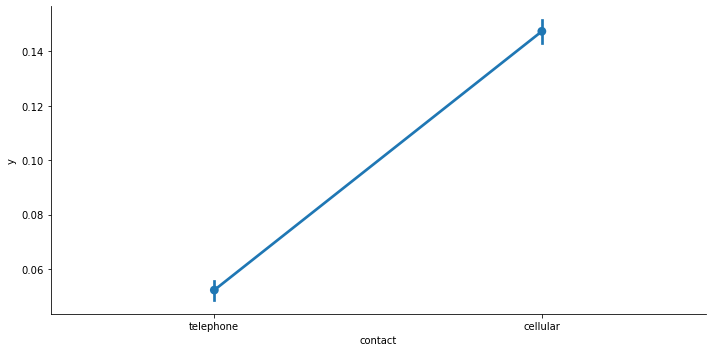

In [34]:
for i, col in enumerate(text_cat_columns):
    plt.figure(i)
    sns.catplot(x=col, y="y", data =df, kind= "point", aspect=2)

## Main findings and conclusion

1. Target varaibles are highly disproportional (36,5K for y=0 vs 4,6K for y=1)

There are two main risks associated with such disproportion:
- It may happen that it will be more effecient for the model just to assigns y=0 for all the samples then investigate the inner relation between avillable features.
- Ordinary train/validation/test spliting is performed ranomly, therefore it is possible to get training set containing only zeros

To overcome the situation of uneven datasets, Stratified train/test splitting can be used. In this approach, additional condition is introduced to preserve the same ratio between values of target variables.
To help the model not to get stuck on only one value of target, resampling approach can be applied and the number of minor target is synthetically increased by taking more samples with y=1 when forming a training set

2. Some numeric columns can be treated as categorical, and some can be transfromed into categories by splitting into groups. However, careful encoding is be required in order not to generate too much features. 

Transformation of numerical variables into categorical ones is matter of dispute. Decision on whether to use continuous or categorical variables actually refers to the importantance of usage of the detailed information about the variation of values in the predictor [https://www.theanalysisfactor.com/3-situations-when-it-makes-sense-to-categorize-a-continuous-predictor-in-a-regression-model/]. However, further transformation categories in binary dumny columns can help to capture some nonlinear patterns in the data. To my mind, the final decisionof whether to use or not to use this technique requires some testing on the particular data

3. Distributions of continious variables are almost similar with respect to target variables

4. There is a strong correlation between euribor3m and emp.var.rate variables

euribor3m is euribor 3 month rate daily indicator. Euribor (The Euro Interbank Offered Rate) is an interest rate based on the average interest rates at which a panel of European banks lend money to one another.
emp.var.rate is employment variation rate quarterly indicator (numeric)
As it can be seen from the scatter plot of emp.var.rate vs euribor3m, the more money assoisiated with euribor3m, more positive employment variation is.

5. Filling missing values is reasonable for some categorical variables

There are many availble strategies for dealing with missing values:
- dropping rows or columns containing missing information.
In the current project, max 5 missing values can be found within a row. Therefore there is no need to drop any data
- filling with values

For categorical features, it can be forward or backward filling when the values of previous or subsequent row is taken
It can be also the most frequent categorical value or value randomly taken from the list of all available categories.
In some cases, separate predictive models can be specially trained to estimate missing information

## Ideas for maximization of the efficiency of marketing campaigns

1. The first idea of optimisation of campaigns might be clusterisation of the data and analysing campaign efficiency whithin these groups

3. The second approach might be applying some machine learning model and analysis of features estimated to be the most responsible for the final prediction

4. The next approach can combine the two previous ones, i.e. training of a machine learning model for each of the groups and analysis of the most important features